<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/Baitap_tuan_9_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
import matplotlib.pyplot as plt

(x_train, y_train) ,(x_test, y_test) = fashion_mnist.load_data()

print("x_train: {}x{}x{}".format(x_train.shape[0], x_train.shape[1], x_train.shape[2]))

x_train: 60000x28x28


In [80]:
print("x_test: {}x{}x{}".format(x_test.shape[0], x_test.shape[1], x_test.shape[2]))

x_test: 10000x28x28


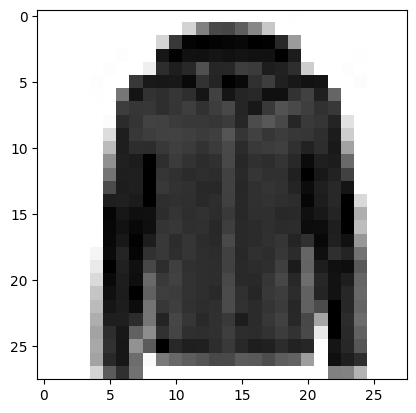

In [81]:
hinh = x_train[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()

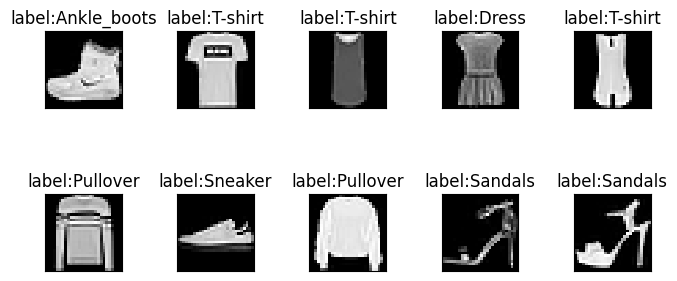

In [82]:
#Tạo list tên dữ liệu
labels = '''T-shirt Trouser Pullover Dress Coat Sandals Shirt Sneaker Bag Ankle_boots'''.split()

for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("label:{}".format(labels[ y_train[i] ]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
from keras.layers import Dense
from keras import models

model=Sequential()
model.add(Dense(512,activation ='relu',input_shape = (28*28,)))
model.add(Dense(512,activation ='relu')) 
model.add(Dense(10,activation='softmax'))

model.summary()

In [84]:
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [85]:
#Converts a class vector (integers) to binary class matrix.
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [86]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss',test_loss)

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.4823 - accuracy: 0.8267
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.3507 - accuracy: 0.8710
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3124 - accuracy: 0.8831
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2920 - accuracy: 0.8913
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.2723 - accuracy: 0.8979
Epoch 6/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2550 - accuracy: 0.9039
Epoch 7/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2464 - accuracy: 0.9075
Epoch 8/10
469/469 [==============================] - 9s 20ms/step - loss: 0.2323 - accuracy: 0.9121
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2228 - accuracy: 0.9145
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.3215 - accur

In [90]:
#Lưu model lại 0.8926
model.save('modelfashion_mnist.h5')

1/1 [==============================] - 0s 22ms/step
Predicted label is [8]


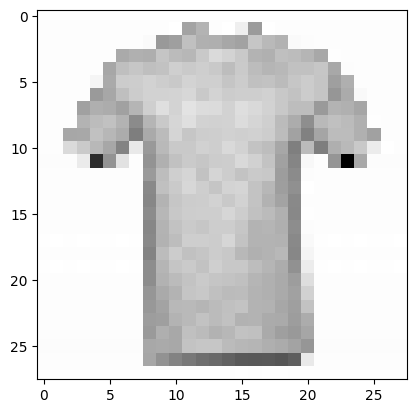

In [97]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('tshirt.jfif', target_size = (28,28),grayscale = True)
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1, 28*28)
img = img.astype('float32')
img = img / 255

predicted_label = np.argmax(model.predict(img),axis = -1)

print("Predicted label is {}".format(predicted_label))